# 4.10 Coding and Reporting

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

This script contains the following points:
1. Importing combined order, product, and customer data
2. Reviewing data for PII concerns
3. Creating random sampling for final analysis
4. Defining new user-fields for region and customer activity
5. Defining customer profiles for analysis
6. Visualizing and analysis for profile trends
7. Additional project analysis

In [2]:
path=r'C:\Users\dell\Desktop\Career Foundry\0423_Instacart Analysis'

In [3]:
# Import pickle instacart merged data set

instacart_merge=pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','instacart_merge.pkl'))

In [4]:
instacart_merge.shape

(32404859, 31)

In [5]:
instacart_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,#ofdays_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,last_name,gender,state,age,date_joined,num_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
instacart_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   order_id                  int64   
 1   user_id                   int64   
 2   order_number              int64   
 3   orders_day_of_week        int64   
 4   order_hour_of_day         int64   
 5   #ofdays_since_last_order  float64 
 6   product_id                int64   
 7   add_to_cart_order         int64   
 8   reordered                 int64   
 9   product_name              object  
 10  aisle_id                  int64   
 11  department_id             int64   
 12  prices                    float64 
 13  price_range_loc           object  
 14  busiest_days              object  
 15  busiest_period_of_day     object  
 16  max_order                 int64   
 17  loyalty_flag              object  
 18  mean_spend                float64 
 19  spending_flag             object  
 20  

In [7]:
# Dropping last_name to avoid personally identifiable information concerns and merge field

df_instacart_clean1 = instacart_merge.drop(['last_name'], axis=1)

In [8]:
df_instacart_clean2 = df_instacart_clean1.drop(['_merge'], axis=1)

In [9]:
df_instacart_clean2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,#ofdays_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_freq,frequency_flag,gender,state,age,date_joined,num_dependants,fam_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423


In [10]:
# Create 70/30 random sample

dev = np.random.rand(len(df_instacart_clean2)) <=0.7

In [11]:
# Create data frames for sampling size

df_instacart_lg = df_instacart_clean2[dev]
df_instacart_sm = df_instacart_clean2[~dev]

In [12]:
# Check against total size

len(df_instacart_lg) + len(df_instacart_sm)

32404859

Check matches original shape of 32,404,859

In [13]:
# Check new dataframe sample size

len(df_instacart_sm)

9721013

# Regions

In [14]:
# Creating Region loop based off state location

result = []

for value in df_instacart_sm["state"]:
  if (value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts'
      or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' 
      or value == 'New Jersey'):
    result.append("Northeast")
  elif (value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' 
        or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas'
        or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri'):
    result.append("Midwest")
  elif (value == 'Delaware' or value == 'Maryland' or value == 'District of Columbia' or value == 'Virginia' 
        or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' 
        or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' 
        or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Louisiana'):
    result.append("South")  
  else:
    result.append("West")

In [15]:
# Creating Region column

df_instacart_sm['Region'] = result

C:\Users\dell\AppData\Local\Temp\ipykernel_6944\2521751388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instacart_sm['Region'] = result


In [16]:
df_instacart_sm['Region'].value_counts(dropna = False)

South        3237643
West         2487618
Midwest      2279643
Northeast    1716109
Name: Region, dtype: int64

Totals match sample sample size total of 9,723,925

In [17]:
df_instacart_sm.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,#ofdays_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,median_freq,frequency_flag,gender,state,age,date_joined,num_dependants,fam_status,income,Region
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
12,2398795,1,2,3,7,15.0,12427,3,1,Original Beef Jerky,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South
13,473747,1,3,3,12,21.0,12427,2,1,Original Beef Jerky,...,20.0,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South


In [18]:
# Create crosstab of Region and Spending_Flag to review spending habits between regions

region_habits = pd.crosstab(df_instacart_sm['Region'],df_instacart_sm['spending_flag'],dropna = False)

In [19]:
region_habits.to_clipboard()

In [20]:
region_habits

spending_flag,High spender,Low spender
Region,,
Midwest,46735,2232908
Northeast,32326,1683783
South,62527,3175116
West,48304,2439314


Spending habits are fairly consistent among Regions. High Spenders average 2% of total population.

In [21]:
# Create exclusion flag for low activity customers with less than 5 orders

df_instacart_sm.loc[df_instacart_sm['max_order'] < 5, 'activity_flag'] = 'Low customer activity'

C:\Users\dell\AppData\Local\Temp\ipykernel_6944\941057902.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instacart_sm.loc[df_instacart_sm['max_order'] < 5, 'activity_flag'] = 'Low customer activity'


In [22]:
df_instacart_sm.loc[df_instacart_sm['max_order'] >= 5, 'activity_flag'] = 'High customer activity'

In [23]:
df_instacart_sm['activity_flag'].value_counts(dropna = False)

High customer activity    9288748
Low customer activity      432265
Name: activity_flag, dtype: int64

In [24]:
# Create subset of High customer activity

df_instacart_hcust = df_instacart_sm[df_instacart_sm['activity_flag'] == 'High customer activity']

In [25]:
# Export high customer activitydata to pkl

df_instacart_hcust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_instacart_hcust.pkl'))

# Customer Profiles

AGE

In [26]:
df_instacart_hcust.agg({'age' : ['min','max','mean']})

,age
min,18.000000
max,81.000000
mean,49.464721


In [27]:
# Age segmentation based of todayfounder.com: https://todayfounder.com/market-segmentation-by-age-the-complete-guide/

df_instacart_hcust.loc[(df_instacart_hcust['age'] <= 39), 'age_profile'] = '18-39'
df_instacart_hcust.loc[(df_instacart_hcust['age'] > 39) & (df_instacart_hcust['age'] <= 59), 'age_profile'] = '40-59'
df_instacart_hcust.loc[(df_instacart_hcust['age'] > 59), 'age_profile'] = '60+'
df_instacart_hcust['age_profile'].value_counts(dropna = False)

C:\Users\dell\AppData\Local\Temp\ipykernel_6944\569771896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instacart_hcust.loc[(df_instacart_hcust['age'] <= 39), 'age_profile'] = '18-39'


18-39    3200600
60+      3171252
40-59    2916896
Name: age_profile, dtype: int64

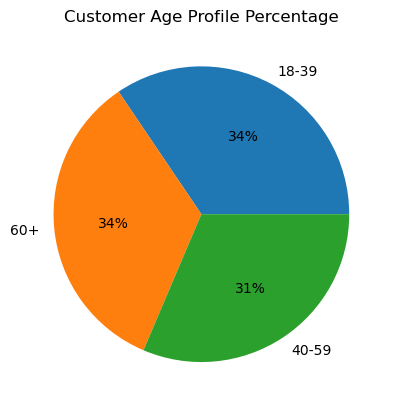

In [28]:
# Create age profile pie chart

ageprofileperc_pie = df_instacart_hcust['age_profile'].value_counts('user_id').plot.pie(title ='Customer Age Profile Percentage', label = '', autopct=('%1.f%%'))

Difference in high activity customer totals by age segmentation is minimal with only a 3% difference in the 40-59 Age Profile

In [29]:
df_instacart_hcust.groupby(['age_profile']).agg({'orders_day_of_week' : ['mean'],'order_hour_of_day' : ['mean'], '#ofdays_since_last_order' : ['mean','min','max'], 'prices' : ['mean','sum']})

orders_day_of_week order_hour_of_day #ofdays_since_last_order  \
                          mean              mean                     mean   
age_profile                                                                 
18-39                 2.733085         13.399873                10.241449   
40-59                 2.743679         13.416626                10.239383   
60+                   2.745791         13.414891                10.214598   

                           prices              
             min   max       mean         sum  
age_profile                                    
18-39        0.0  30.0  11.750369  37608230.7  
40-59        0.0  30.0  12.074772  35220852.9  
60+          0.0  30.0  11.569686  36690391.2

Average of orders by day_of_week, hour_of_day, and days_since_last_order indicate there is minimal difference of customer purchasing habits by age. The 18-39 Age Profile spends a little more on average than the groups

INCOME

In [30]:
df_instacart_hcust.agg({'income' : ['min','max','mean']})

,income
min,25903.000000
max,593901.000000
mean,99658.796183


In [31]:
# Income segmentation based off pewresearch.org: https://www.pewresearch.org/short-reads/2022/04/20/how-the-american-middle-class-has-changed-in-the-past-five-decades/

df_instacart_hcust.loc[(df_instacart_hcust['income'] <= 30000), 'income_profile'] = 'Lower income'
df_instacart_hcust.loc[(df_instacart_hcust['income'] > 30000) & (df_instacart_hcust['income'] <= 90000), 'income_profile'] = 'Middle income'
df_instacart_hcust.loc[(df_instacart_hcust['income'] > 90000), 'income_profile'] = 'Upper income'
df_instacart_hcust['income_profile'].value_counts(dropna = False)

C:\Users\dell\AppData\Local\Temp\ipykernel_6944\191085385.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instacart_hcust.loc[(df_instacart_hcust['income'] <= 30000), 'income_profile'] = 'Lower income'


Upper income     5346970
Middle income    3883563
Lower income       58215
Name: income_profile, dtype: int64

Largest customer base totals are in the Middle to Upper income segmentation.

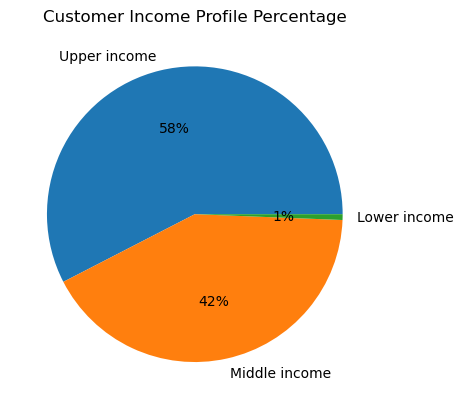

In [32]:
# Create income profile pie chart

incomeprofileperc_pie = df_instacart_hcust['income_profile'].value_counts('user_id').plot.pie(title ='Customer Income Profile Percentage', label = '', autopct=('%1.f%%'))

In [33]:
df_instacart_hcust.groupby(['income_profile']).agg({'orders_day_of_week' : ['mean'],'order_hour_of_day' : ['mean'], '#ofdays_since_last_order' : ['mean','min','max'], 'prices' : ['mean','sum']})

orders_day_of_week order_hour_of_day #ofdays_since_last_order  \
                             mean              mean                     mean   
income_profile                                                                 
Lower income             2.684171         13.115898                10.883673   
Middle income            2.738467         13.373453                10.271124   
Upper income             2.743024         13.440200                10.195851   

                              prices              
                min   max       mean         sum  
income_profile                                    
Lower income    0.0  30.0   6.507804    378851.8  
Middle income   0.0  30.0   7.692380  29873842.7  
Upper income    0.0  30.0  14.824617  79266780.3

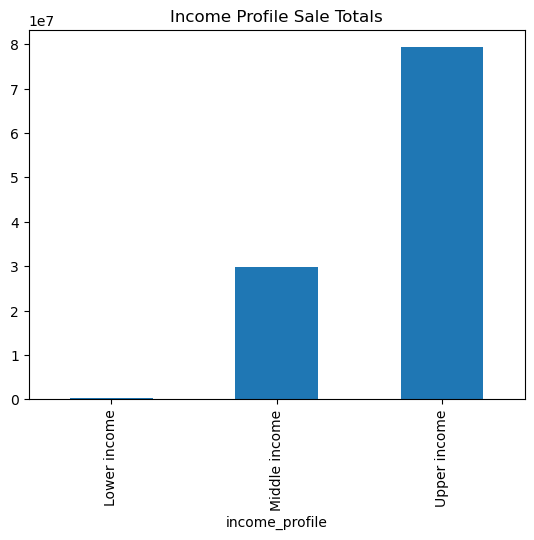

In [34]:
# Income profile bar chart

incomeprofilesales_bar = df_instacart_hcust.groupby(['income_profile']).agg({'prices':['sum']}).plot.bar(title ='Income Profile Sale Totals',legend=None)

Average of orders by day_of_week, hour_of_day, and days_since_last_order indicate there is minimal difference of customer purchasing habits by income. Upper income spends roughly twice as much as on average and the lower and middle income brackets. Upper income total spend is nearly 3 times as much as the middle income

In [35]:
pd.crosstab(df_instacart_hcust['age_profile'],df_instacart_hcust['income_profile'],dropna = False)

income_profile,Lower income,Middle income,Upper income
age_profile,,,
18-39,50444,2589873,560283
40-59,4514,668837,2243545
60+,3257,624853,2543142


Significantly less customers that are 40 or older fall into the lower income bracket. 

DEPARTMENT GOODS

In [36]:
# Import department data

df_dept=pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'))

In [37]:
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [38]:
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [39]:
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [40]:
# Merge departments with current high activity customers

df_insta_dept_hcust = df_instacart_hcust.merge(df_dept, on = 'department_id')

In [41]:
crosstab_dept_age= pd.crosstab(df_insta_dept_hcust['department'],df_insta_dept_hcust['age_profile'],dropna = False)

In [42]:
crosstab_dept_age['all'] = crosstab_dept_age['18-39']+crosstab_dept_age['40-59']+crosstab_dept_age['60+']

In [43]:
crosstab_dept_age_sort = crosstab_dept_age.sort_values('all',ascending = True)
crosstab_dept_age_sort = crosstab_dept_age_sort.drop('all',axis=1)
crosstab_dept_age_sort

age_profile,18-39,40-59,60+
department,,,
bulk,3499,3181,3444
other,3642,3224,3460
missing,6792,6100,6471
pets,9631,8759,9562
alcohol,15420,13394,14205
international,26590,24190,25950
babies,42574,39214,41676
personal care,43628,40475,43262
breakfast,69172,63235,68366


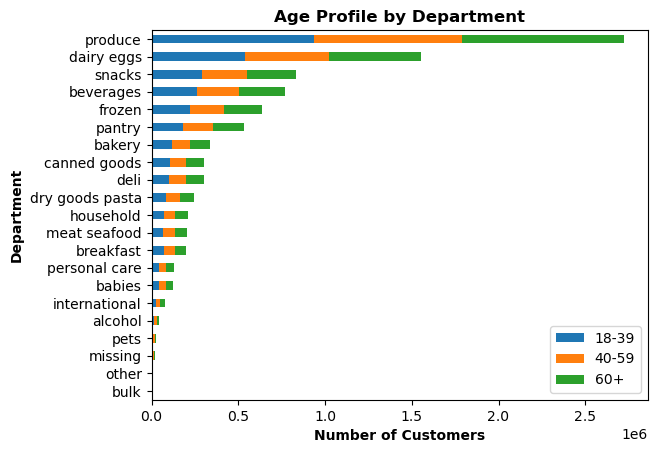

In [44]:
# Create a stacked chart for number of age profile by department

dept_age_stackedbar = crosstab_dept_age_sort.plot(kind = 'barh', stacked = True, color = sns.color_palette('tab10', 3))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.xlabel('Number of Customers', fontweight = 'bold')
plt.title('Age Profile by Department', fontweight = 'bold')
plt.show()

In [45]:
crosstab_dept_income = pd.crosstab(df_insta_dept_hcust['department'],df_insta_dept_hcust['income_profile'],dropna = False)

In [46]:
crosstab_dept_income['all'] = crosstab_dept_income['Lower income']+crosstab_dept_income['Middle income']+crosstab_dept_income['Upper income']

In [47]:
crosstab_dept_income_sort = crosstab_dept_income.sort_values('all',ascending = True)
crosstab_dept_income_sort = crosstab_dept_income_sort .drop('all',axis=1)
crosstab_dept_income_sort 

income_profile,Lower income,Middle income,Upper income
department,,,
bulk,107,4549,5468
other,82,4325,5919
missing,108,8122,11133
pets,138,11023,16791
alcohol,358,17426,25235
international,427,30754,45549
babies,434,48630,74400
personal care,762,53914,72689
breakfast,1456,88177,111140


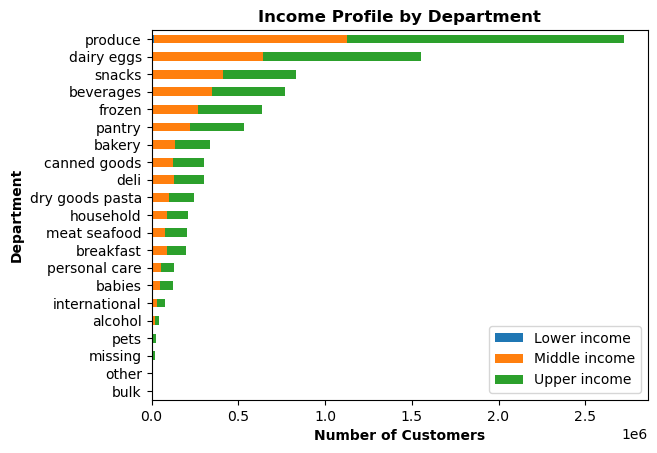

In [48]:
# Create a stacked chart for income profile by department

dept_income_stackedbar = crosstab_dept_income_sort.plot(kind = 'barh', stacked = True, color = sns.color_palette('tab10', 3))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.xlabel('Number of Customers', fontweight = 'bold')
plt.title('Income Profile by Department', fontweight = 'bold')
plt.show()

In [49]:
pd.crosstab(df_insta_dept_hcust['department'],df_insta_dept_hcust['income_profile'],dropna = False)

income_profile,Lower income,Middle income,Upper income
department,,,
alcohol,358,17426,25235
babies,434,48630,74400
bakery,1766,135997,198887
beverages,6980,342063,422521
breakfast,1456,88177,111140
bulk,107,4549,5468
canned goods,1256,119948,181954
dairy eggs,8545,635823,907621
deli,1921,124780,174004


Department spending habits are consistent between age and income with produce, dairy/eggs, snacks, beverages, and frozen items being the top 5 items purchased in decending order.

DEPENDENTS

In [50]:
df_insta_dept_hcust.agg({'num_dependants' : ['min','max','mean']})

,num_dependants
min,0.000000
max,3.000000
mean,1.501722


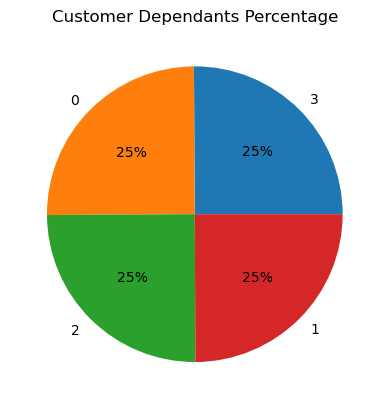

In [51]:
# Create dependants pie chart

numdepend_pie = df_insta_dept_hcust['num_dependants'].value_counts('user_id').plot.pie(title ='Customer Dependants Percentage', label = '', autopct=('%1.f%%'))

In [52]:
df_insta_dept_hcust.groupby(['num_dependants']).agg({'orders_day_of_week' : ['mean'],'order_hour_of_day' : ['mean'], '#ofdays_since_last_order' : ['mean','min','max'], 'prices' : ['mean','sum']})

orders_day_of_week order_hour_of_day #ofdays_since_last_order  \
                             mean              mean                     mean   
num_dependants                                                                 
0                        2.736072         13.419985                10.205717   
1                        2.746547         13.391327                10.228418   
2                        2.747853         13.411473                10.245896   
3                        2.732577         13.418185                10.246441   

                              prices              
                min   max       mean         sum  
num_dependants                                    
0               0.0  30.0  11.845228  27498578.2  
1               0.0  30.0  11.703824  27107683.4  
2               0.0  30.0  12.137555  28163775.5  
3               0.0  30.0  11.476820  26749437.7

Average of orders by day_of_week, hour_of_day, and days_since_last_order indicate there is minimal difference of customer purchasing habits by number of dependants. Customers with two dependants spend the most. 

In [53]:
pd.crosstab(df_instacart_hcust['age_profile'],df_instacart_hcust['num_dependants'],dropna = False)

num_dependants,0,1,2,3
age_profile,,,,
18-39,798398,797402,801804,802996
40-59,728772,743840,713681,730603
60+,794320,774897,804898,797137


In [54]:
pd.crosstab(df_instacart_hcust['income_profile'],df_instacart_hcust['num_dependants'],dropna = False)

num_dependants,0,1,2,3
income_profile,,,,
Lower income,15820,12914,15434,14047
Middle income,966009,970671,970388,976495
Upper income,1339661,1332554,1334561,1340194


The difference in number of dependants by age and income profiles is minimal. 

In [55]:
crosstab_dept_dependants = pd.crosstab(df_insta_dept_hcust['department'],df_insta_dept_hcust['num_dependants'],dropna = False)

In [56]:
crosstab_dept_dependants['all'] = crosstab_dept_dependants[0]+crosstab_dept_dependants[1]+crosstab_dept_dependants[2]+crosstab_dept_dependants[3]

In [57]:
crosstab_dept_dependants_sort = crosstab_dept_dependants.sort_values('all',ascending = True)
crosstab_dept_dependants_sort = crosstab_dept_dependants_sort .drop('all',axis=1)
crosstab_dept_dependants_sort 

num_dependants,0,1,2,3
department,,,,
bulk,2391,2595,2584,2554
other,2613,2624,2572,2517
missing,4742,4715,4911,4995
pets,7173,7131,6811,6837
alcohol,10859,10575,10468,11117
international,19349,19491,18923,18967
babies,30833,30125,31549,30957
personal care,31748,31710,31740,32167
breakfast,49912,50666,50244,49951


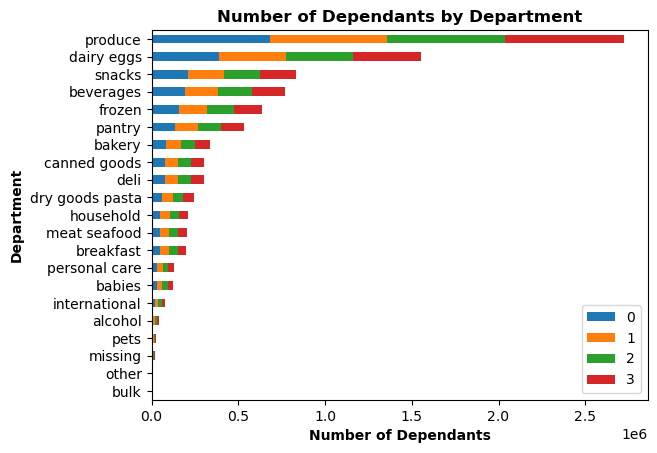

In [58]:
# Create a stacked chart for number of dependants by department

dept_depend_stackedbar = crosstab_dept_dependants_sort.plot(kind = 'barh', stacked = True, color = sns.color_palette('tab10', 4))
plt.legend(loc='lower right')
plt.ylabel('Department', fontweight = 'bold')
plt.xlabel('Number of Dependants', fontweight = 'bold')
plt.title('Number of Dependants by Department', fontweight = 'bold')
plt.show()

Number of dependants does not change established customer spending habits

# Geographical Profile Comparisons

In [59]:
# Crosstab for comparsison ages by regions

crosstab_region_age = pd.crosstab(df_insta_dept_hcust['Region'], df_insta_dept_hcust['age_profile'], dropna = False)

In [60]:
crosstab_region_age['all'] = crosstab_region_age['18-39']+crosstab_region_age['40-59']+crosstab_region_age['60+']

In [61]:
crosstab_region_sort = crosstab_region_age.sort_values('all',ascending = False)
crosstab_region_sort = crosstab_region_sort .drop('all',axis=1)
crosstab_region_sort

age_profile,18-39,40-59,60+
Region,,,
South,1083455,954539,1055628
West,810604,753564,813462
Midwest,745221,696656,736826
Northeast,561320,512137,565336


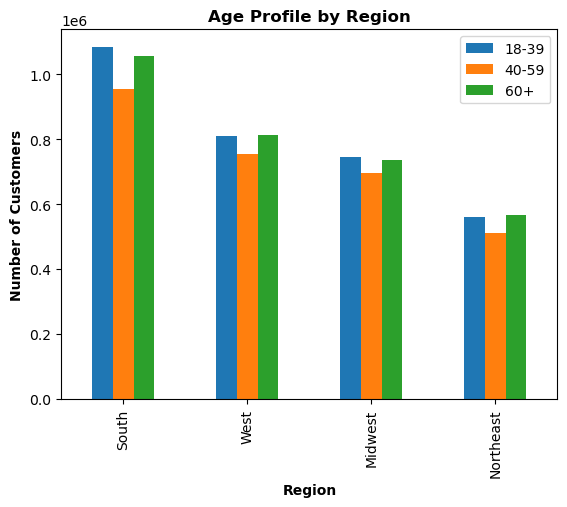

In [62]:
# Create a bar chart for age profiles by region

region_age = crosstab_region_sort.plot(kind = 'bar', color = sns.color_palette('tab10', 3))
plt.legend(loc='upper right')
plt.xlabel('Region', fontweight = 'bold')
plt.ylabel('Number of Customers', fontweight = 'bold')
plt.title('Age Profile by Region', fontweight = 'bold')
plt.show()

Age profile ratios are fairly consistent by Region. While the South region is the largest customer base, it also has a higher percentage of 18-39 year olds than the other regions

In [63]:
# Crosstab for comparsison income by regions

crosstab_region_income = pd.crosstab(df_insta_dept_hcust['Region'], df_insta_dept_hcust['income_profile'], dropna = False)

In [64]:
crosstab_region_income['all'] = crosstab_region_income['Lower income']+crosstab_region_income['Middle income']+crosstab_region_income['Upper income']

In [65]:
crosstab_regioninc_sort = crosstab_region_income.sort_values('all',ascending = False)
crosstab_regioninc_sort = crosstab_regioninc_sort .drop('all',axis=1)
crosstab_regioninc_sort

income_profile,Lower income,Middle income,Upper income
Region,,,
South,19657,1308386,1765579
West,12587,997708,1367335
Midwest,16103,898917,1263683
Northeast,9868,678552,950373


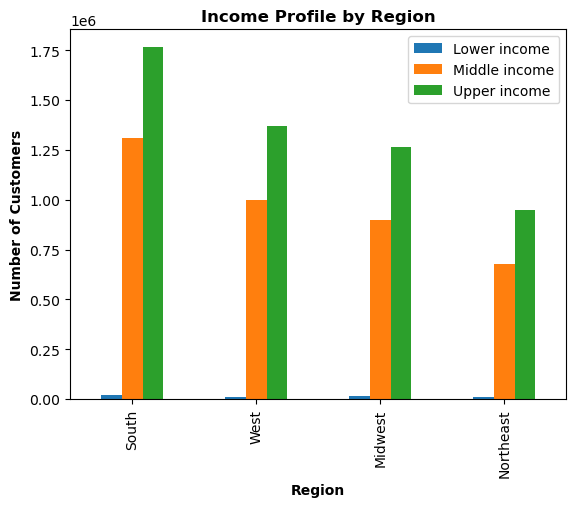

In [66]:
# Create a bar chart for income profiles by region

region_income = crosstab_regioninc_sort.plot(kind = 'bar', color = sns.color_palette('tab10', 3))
plt.legend(loc='upper right')
plt.xlabel('Region', fontweight = 'bold')
plt.ylabel('Number of Customers', fontweight = 'bold')
plt.title('Income Profile by Region', fontweight = 'bold')
plt.show()

In [67]:
pd.crosstab(df_insta_dept_hcust['Region'], df_insta_dept_hcust['income_profile'], dropna = False)

income_profile,Lower income,Middle income,Upper income
Region,,,
Midwest,16103,898917,1263683
Northeast,9868,678552,950373
South,19657,1308386,1765579
West,12587,997708,1367335


Income profile ratios are also fairly consistent by Region. The South region has about one percent more customers in the middle income profile. This result trends to the larger 18-39 year population as that age bracket makes less than those who are 40+ years.

In [68]:
df_top5_dept = df_insta_dept_hcust.loc[df_insta_dept_hcust['department'].isin(['produce','dairy eggs','snacks','beverages', 'frozen'])]

In [69]:
# Crosstab for comparsison for top 5 departments by region

crosstab_region_departments = pd.crosstab(df_top5_dept['department'], df_insta_dept_hcust['Region'], dropna = False)
crosstab_region_departments

Region,Midwest,Northeast,South,West
department,,,,
beverages,180146,139256,257082,195080
dairy eggs,363121,273700,516865,398303
frozen,150160,110742,213847,163614
produce,639979,477649,907902,697034
snacks,193491,148057,275635,213425


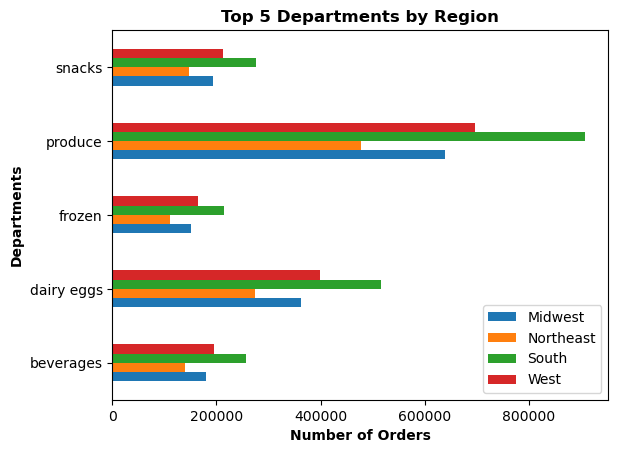

In [70]:
# Create a horizontal bar chart for top 5 departments

region_departments = crosstab_region_departments.plot(kind = 'barh', color = sns.color_palette('tab10', 4))
plt.legend(loc='lower right')
plt.ylabel('Departments', fontweight = 'bold')
plt.xlabel('Number of Orders', fontweight = 'bold')
plt.title('Top 5 Departments by Region', fontweight = 'bold')
plt.show()

In [71]:
pd.crosstab(df_top5_dept['department'], df_insta_dept_hcust['Region'], dropna = False)

Region,Midwest,Northeast,South,West
department,,,,
beverages,180146,139256,257082,195080
dairy eggs,363121,273700,516865,398303
frozen,150160,110742,213847,163614
produce,639979,477649,907902,697034
snacks,193491,148057,275635,213425


There is no sizeable difference in top 5 spending habits by department between geographical regions

In [72]:
df_instacart_clean2.value_counts('product_name').head(20)

product_name
Banana                      472565
Bag of Organic Bananas      379450
Organic Strawberries        264683
Organic Baby Spinach        241921
Organic Hass Avocado        213584
Organic Avocado             176815
Large Lemon                 152657
Strawberries                142951
Limes                       140627
Organic Whole Milk          137905
Organic Raspberries         137057
Organic Yellow Onion        113426
Organic Garlic              109778
Organic Zucchini            104823
Organic Blueberries         100060
Cucumber Kirby               97315
Organic Fuji Apple           89632
Organic Lemon                87746
Apple Honeycrisp Organic     85020
Organic Grape Tomatoes       84255
dtype: int64

In [73]:
top_produce = df_insta_dept_hcust.product_name == 'Banana'

In [74]:
product_price = df_insta_dept_hcust.groupby(['product_name']).agg({'prices' : ['max']})

In [75]:
# Crosstab for comparsison loyalty by frequency

crosstab_loyal_freq = pd.crosstab(df_insta_dept_hcust['frequency_flag'], df_insta_dept_hcust['loyalty_flag'], dropna = False)

In [76]:
crosstab_loyal_freq['all'] = crosstab_loyal_freq['Loyal customer']+crosstab_loyal_freq['New customer']+crosstab_loyal_freq['Regular customer']

In [77]:
crosstab_loyal_freq_sort = crosstab_loyal_freq.sort_values('all',ascending = False)
crosstab_loyal_freq_sort = crosstab_loyal_freq_sort .drop('all',axis=1)
crosstab_loyal_freq_sort

loyalty_flag,Loyal customer,New customer,Regular customer
frequency_flag,,,
Frequent customer,3081956,497443,3080744
Regular customer,707,484213,1486507
Non-Frequent customer,0,458232,198946


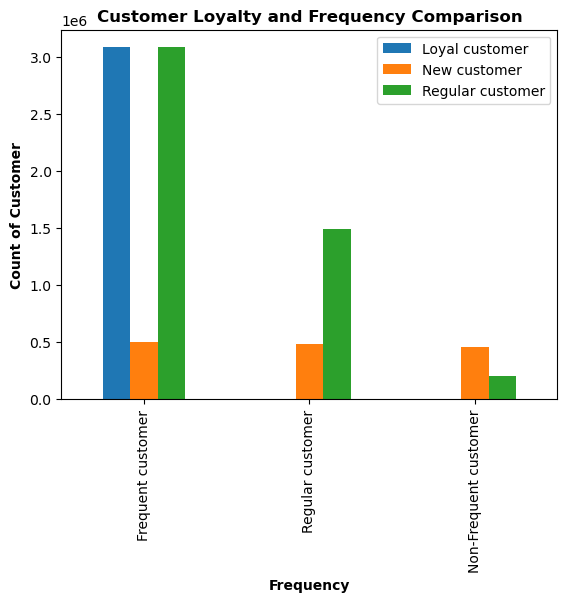

In [78]:
crosstab_loyal_freq_bar = crosstab_loyal_freq_sort.plot(kind = 'bar')
plt.legend(loc='upper right')
plt.xlabel('Frequency', fontweight = 'bold')
plt.ylabel('Count of Customer', fontweight = 'bold')
plt.title('Customer Loyalty and Frequency Comparison', fontweight = 'bold')
plt.show()

In [79]:
df_insta_dept_hcust.loc[df_insta_dept_hcust['prices']>100, 'prices'] = np.nan

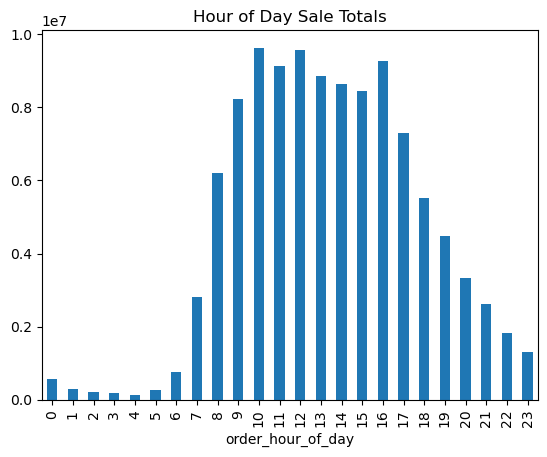

In [80]:
# Total sales bar chart

hour_of_day_total_sales = df_instacart_hcust.groupby(['order_hour_of_day']).agg({'prices':['sum']}).plot.bar(title ='Hour of Day Sale Totals',legend=None)

In [81]:
# Crosstab for comparsison income by price_range

pd.crosstab(df_insta_dept_hcust['income_profile'], df_insta_dept_hcust['price_range_loc'], dropna = False)

price_range_loc,High-range product,Low-range product,Mid-range product
income_profile,,,
Lower income,220,25105,32890
Middle income,43323,1287241,2552999
Upper income,75828,1590295,3680847


In [82]:
df_insta_dept_hcust['price_range_loc'].value_counts(dropna=False)

Mid-range product     6266736
Low-range product     2902641
High-range product     119371
Name: price_range_loc, dtype: int64

In [83]:
pd.crosstab(df_insta_dept_hcust['frequency_flag'], df_insta_dept_hcust['Region'], dropna = False)

Region,Midwest,Northeast,South,West
frequency_flag,,,,
Frequent customer,1549085,1175349,2222490,1713219
Non-Frequent customer,157707,113751,219820,165900
Regular customer,471911,349693,651312,498511


In [84]:
df_insta_dept_hcust['Organic_vs_Non'] = np.where(df_insta_dept_hcust['product_name'].str.contains('Organic'), 'Organic', 'Not_organic')

In [85]:
df_insta_dept_hcust.Organic_vs_Non.head()

0    Not_organic
1    Not_organic
2    Not_organic
3    Not_organic
4    Not_organic
Name: Organic_vs_Non, dtype: object

In [86]:
df_produce = df_insta_dept_hcust.loc[df_insta_dept_hcust['department'] == 'produce']

In [87]:
df_insta_dept_hcust.groupby(['Organic_vs_Non']).agg({'orders_day_of_week' : ['mean'],'order_hour_of_day' : ['mean'], '#ofdays_since_last_order' : ['mean','min','max'], 'prices' : ['mean','sum']})

orders_day_of_week order_hour_of_day #ofdays_since_last_order  \
                             mean              mean                     mean   
Organic_vs_Non                                                                 
Not_organic              2.762027         13.400475                10.434477   
Organic                  2.695281         13.431174                 9.798156   

                             prices              
                min   max      mean         sum  
Organic_vs_Non                                   
Not_organic     0.0  30.0  7.807827  49394507.7  
Organic         0.0  30.0  7.753962  22959753.1

In [88]:
# Crosstab for comparsison income by regions

crosstab_organic_order = pd.crosstab(df_insta_dept_hcust['Organic_vs_Non'], df_produce['department'], dropna = False)
crosstab_organic_order

department,produce
Organic_vs_Non,
Not_organic,1245479
Organic,1477085


In [89]:
crosstab_income_org = pd.crosstab(df_insta_dept_hcust['income_profile'], df_insta_dept_hcust['Organic_vs_Non'], dropna = False)
crosstab_income_org

Organic_vs_Non,Not_organic,Organic
income_profile,,
Lower income,43124,15091
Middle income,2668283,1215280
Upper income,3616306,1730664


In [90]:
# Export of visualizations

ageprofileperc_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'ageprofileperc_pie.png'))
incomeprofileperc_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'incomeprofileperc_pie.png'))
incomeprofilesales_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'incomeprofilesales_bar.png'))
dept_age_stackedbar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_age_stackedbar.png'))
dept_income_stackedbar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_income_stackedbar.png'))    
numdepend_pie.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'numdepend_pie.png'))    
dept_depend_stackedbar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dept_depend_stackedbar.png'))    
region_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_age.png'))    
region_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_income.png'))    
region_departments.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_departments.png'))   
crosstab_loyal_freq_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'crosstab_loyal_freq_bar.png'))   
hour_of_day_total_sales.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hour_of_day_total_sales.png'))

In [91]:
# Export data to pkl

df_insta_dept_hcust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'insta_dept_hcust.pkl'))